In [54]:
# Importing all the necessary libraries
import numpy as np 
import re
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, preprocessing
from sklearn.model_selection import cross_val_score, train_test_split

In [55]:
dataset = pd.read_csv('../Data/LendingData.csv')

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887350 entries, 0 to 887349
Data columns (total 39 columns):
Unnamed: 0                             887350 non-null int64
loan_amnt                              887350 non-null float64
term                                   887350 non-null int64
int_rate                               887350 non-null float64
installment                            887350 non-null float64
sub_grade                              887350 non-null int64
emp_length                             887350 non-null int64
annual_inc                             887350 non-null int64
issue_d                                887350 non-null object
dti                                    887350 non-null float64
delinq_2yrs                            887350 non-null float64
open_acc                               887350 non-null float64
total_acc                              887350 non-null float64
out_prncp                              887350 non-null float64
total_pymnt       

In [57]:
Y = dataset.pop('int_rate').values

In [59]:
dataset.pop('Unnamed: 0')
dataset.pop('issue_d')
print(Y)

[10.65 15.27 15.96 ... 15.99 19.99 11.99]


In [61]:
X = dataset.values

In [60]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887350 entries, 0 to 887349
Data columns (total 36 columns):
loan_amnt                              887350 non-null float64
term                                   887350 non-null int64
installment                            887350 non-null float64
sub_grade                              887350 non-null int64
emp_length                             887350 non-null int64
annual_inc                             887350 non-null int64
dti                                    887350 non-null float64
delinq_2yrs                            887350 non-null float64
open_acc                               887350 non-null float64
total_acc                              887350 non-null float64
out_prncp                              887350 non-null float64
total_pymnt                            887350 non-null float64
total_pymnt_inv                        887350 non-null float64
acc_now_delinq                         887350 non-null float64
OwnerOf_MORTGAG

## Creating a function for Random Forest and calculating the MAPE for test data and train data

In [62]:
def ran_for(model, X_train, X_test, Y_train, Y_test):
    sc = StandardScaler()  
    X_train = sc.fit_transform(X_train)  
    X_test = sc.transform(X_test) 
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    RMSE = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
    MAPE_test = np.mean(np.abs((Y_test - y_pred) / Y_test)) * 100
    MAPE_train = np.mean(np.abs((Y_train - y_pred_train) / Y_train)) * 100
    return RMSE, MAPE_test,MAPE_train, y_pred, y_pred_train, model

In [67]:
Y_train

array([ 9.99,  8.19, 22.4 , ..., 15.99,  8.39,  5.32])

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
regressor = RandomForestRegressor()
rmse, mape_test, mape_train, y_pred, y_train_pred, model = ran_for(regressor,X_train, X_test, Y_train, Y_test)
print("MAPE for Test: ", mape_test, "MAPE for Train: ", mape_train)

C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


MAPE for Test:  1.1791662166934926 MAPE for Train:  0.45965544731689695


## 5-FOLD cross-validation 

In [30]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 

MAPE_TEST = []
MAPE_TRAIN = []
Y_test_array=[]
y_pred_array=[]
Y_train_ret_array = []
y_train_pred_array=[]
regressor = RandomForestRegressor() # No regularization

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    rmse, mape_test, mape_train, y_pred, y_train_pred, model = ran_for(regressor,X_train, X_test, Y_train, Y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    Y_test_array.append(Y_test)
    y_pred_array.append(y_pred)
    Y_train_ret_array.append(Y_train)
    y_train_pred_array.append(y_train_pred)
print('------------------------------------------------------------------')    
print("MAPE on test data is :", MAPE_TEST)
print("MAPE on train data is :", MAPE_TRAIN)

avg_MAPE_Test = sum(MAPE_TEST)/len(MAPE_TEST)
print('avg_MAPE_Test',avg_MAPE_Test)
avg_MAPE_Train = sum(MAPE_TRAIN)/len(MAPE_TRAIN)
print('avg_MAPE_Train',avg_MAPE_Train)

KFold(n_splits=5, random_state=None, shuffle=False)
TRAIN: [177470 177471 177472 ... 887347 887348 887349] TEST: [     0      1      2 ... 177467 177468 177469]


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


TRAIN: [     0      1      2 ... 887347 887348 887349] TEST: [177470 177471 177472 ... 354937 354938 354939]
TRAIN: [     0      1      2 ... 887347 887348 887349] TEST: [354940 354941 354942 ... 532407 532408 532409]
TRAIN: [     0      1      2 ... 887347 887348 887349] TEST: [532410 532411 532412 ... 709877 709878 709879]
TRAIN: [     0      1      2 ... 709877 709878 709879] TEST: [709880 709881 709882 ... 887347 887348 887349]
------------------------------------------------------------------
MAPE on test data is : [5.316714767574618, 2.039607194651975, 1.7644504427439658, 0.4696664976552604, 1.5853284700911154]
MAPE on train data is : [0.324262972556503, 0.4160060783813066, 0.4320440758668222, 0.4814014210311733, 0.4319460218406156]
avg_MAPE_Test 2.235153474543387
avg_MAPE_Train 0.4171321139352841


## Hyper-Parameter Tuning

In [75]:
# Grid-search approach:
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits=5)
kf.get_n_splits(X)

print(kf) 
regressor = RandomForestRegressor() 
param_grid = {"n_estimators": [10,11],
             "max_depth": [7,8]}

# run grid search
grid_search = GridSearchCV(regressor, param_grid=param_grid, cv=5)
grid_search.fit(X, Y)

print(grid_search.score)


KFold(n_splits=5, random_state=None, shuffle=False)
<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 11], 'max_depth': [7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>


In [40]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
importances = model.feature_importances_
X_feat = dataset.values

print(kf) 



max_depth_list = [3,4,5,6,7,8]

for depth in max_depth_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]
    regressor = RandomForestRegressor(max_depth= depth) 

    for train_index, test_index in kf.split(X_feat):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_feat[train_index], X_feat[test_index]
        Y_train, Y_test = Y_feat[train_index], Y_feat[test_index]
        rmse, mape_test, mape_train, y_pred, y_train_pred, model = ran_for(regressor,X_train, X_test, Y_train, Y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
#     Y_test_array.append(Y_test)
#     y_pred_array.append(y_pred)
#     Y_train_ret_array.append(Y_train)
#     y_train_pred_array.append(y_train_pred)
    print("depth = ",depth, MAPE_TEST)
# print("MAPE on test data is :", MAPE_TEST)
# print("MAPE on train data is :", MAPE_TRAIN)

KFold(n_splits=5, random_state=None, shuffle=False)


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth =  3 [6.679338895992265]


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth =  4 [6.00587581703539]


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth =  5 [5.544189291039043]


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth =  6 [4.822311207972686]


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth =  7 [3.8417420342311956]


C:\Users\Nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth =  8 [3.3910266781474787]


In [43]:
kf = KFold(n_splits=5)
kf.get_n_splits(X_feat)

print(kf) 


n_estimator_list = [10,15,20,25,30]

for est in n_estimator_list:
    MAPE_TEST = []  
    MAPE_TRAIN =[]   
    regressor = RandomForestRegressor(max_depth= 8, n_estimators= est) 

    for train_index, test_index in kf.split(X_feat):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X_feat[train_index], X_feat[test_index]
        Y_train, Y_test = Y_feat[train_index], Y_feat[test_index]
        rmse, mape_test, mape_train, y_pred, y_train_pred, model = ran_for(regressor,X_train, X_test, Y_train, Y_test)
    MAPE_TEST.append(mape_test)
    MAPE_TRAIN.append(mape_train)
    print("estimator = ",est,"MAPE :", MAPE_TEST)

KFold(n_splits=5, random_state=None, shuffle=False)
estimator =  10 MAPE : [3.3784099696727568]
estimator =  15 MAPE : [3.381266113192094]
estimator =  20 MAPE : [3.3950530168583013]
estimator =  25 MAPE : [3.387754196791752]
estimator =  30 MAPE : [3.378218188948]


From the above hyper-parameter optimization, we can gather that a tree depth of 8 and a estimator of 30 gives us the least MAPE

## Use-Case 

In [82]:
df = dataset.sample(n = 50, random_state = 1)
actual = Y[df.index]
actual

array([20.49, 13.33, 21.98, 15.99, 11.99,  5.93, 10.49, 16.59,  8.9 ,
       17.27, 17.57,  7.26, 13.33, 11.53,  8.19,  9.67, 16.29, 14.65,
       15.61,  8.18, 11.53, 13.49, 13.33, 13.98, 10.99, 14.3 , 12.99,
       20.49, 15.8 , 14.65, 18.49, 23.99,  9.17, 13.98, 13.35,  7.89,
       15.61, 18.84,  7.69, 15.61, 12.05, 18.99, 16.49, 13.33, 14.33,
       16.59,  7.26,  9.17,  8.9 , 15.61])

In [81]:
prediction = grid_search.predict(df)
prediction

array([20.17223495, 13.38447085, 20.86020612, 16.74806871, 11.36377643,
        5.69656266, 10.78632542, 16.71525976,  8.63646561, 17.64050954,
       17.55358766,  7.33537807, 13.33071882, 11.49170619,  8.42280588,
        9.80422935, 16.53541889, 14.93502684, 15.74491711,  8.22672148,
       11.92665413, 13.89272387, 13.33071882, 13.67214482, 11.20931425,
       13.69060924, 13.69060924, 19.37695763, 15.02369744, 14.62937105,
       17.48947432, 23.77725469,  9.17996731, 13.69060924, 13.92044416,
        7.92877383, 15.63636923, 20.04398356,  7.7941125 , 15.34876334,
       12.23547942, 19.26151106, 16.96151566, 13.33071882, 13.69060924,
       15.63636923,  7.21849083,  9.29162861,  8.72286398, 15.61953551])

In [83]:
UseCase = pd.DataFrame()
UseCase['Actual'] = actual.tolist()
UseCase['Predicted'] = prediction.tolist()
UseCase.to_csv('UseCase.csv')

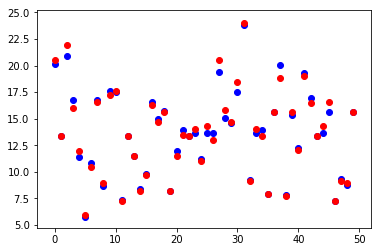

In [98]:
plt.scatter(np.arange(50), UseCase['Predicted'],color='blue')
plt.scatter(np.arange(50), UseCase['Actual'],color ='red')
plt.show()
